In [53]:
import pandas as pd
import re
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

### Familiarización con los datos

In [2]:
url = "datos_negocios_limpios.csv"
df = pd.read_csv(url)

def funcion1(a):
    if(a!="Sin atributos"):
        return eval(a)

def funcion2(a):
    if(a!="Sin horas"):
        return eval(a)
    
df["categorias"]=df["categorias"].apply(lambda s: eval(s))
df["atributos"]=df["atributos"].apply(lambda s: funcion1(s))
df["horas"]=df["horas"].apply(lambda s: funcion2(s) )
df=df.drop(list(df.columns)[0],axis=1)
df

,negocio_id,nombre,direccion,ciudad,estado,codigo_postal,latitud,longitud,puntuacion,num_revisiones,abierto,atributos,categorias,horas
0,1SWheh84yJXfytovILXOAQ,Arizona Biltmore Golf Club,2818 E Camino Acequia Drive,Phoenix,AZ,85016,33.522143,-112.018481,3.0,5,0,{'GoodForKids': 'False'},"[Golf, Active Life]",None
1,QXAEGFB4oINsVuTFxEYKFQ,Emerald Chinese Restaurant,30 Eglinton Avenue W,Mississauga,ON,L5R 3E7,43.605499,-79.652289,2.5,128,1,"{'RestaurantsReservations': 'True', 'GoodForMe...","[Specialty Food, Restaurants, Dim Sum, Impo...","{'Monday': '9:0-0:0', 'Tuesday': '9:0-0:0', 'W..."
2,gnKjwL_1w79qoiV3IC_xQQ,Musashi Japanese Restaurant,"10110 Johnston Rd, Ste 15",Charlotte,NC,28210,35.092564,-80.859132,4.0,170,1,"{'GoodForKids': 'True', 'NoiseLevel': 'u'avera...","[Sushi Bars, Restaurants, Japanese]","{'Monday': '17:30-21:30', 'Wednesday': '17:30-..."
3,xvX2CttrVhyG2z1dFg_0xw,Farmers Insurance - Paul Lorenz,"15655 W Roosevelt St, Ste 237",Goodyear,AZ,85338,33.455613,-112.395596,5.0,3,1,None,"[Insurance, Financial Services]","{'Monday': '8:0-17:0', 'Tuesday': '8:0-17:0', ..."
4,HhyxOkGAM07SRYtlQ4wMFQ,Queen City Plumbing,"4209 Stuart Andrew Blvd, Ste F",Charlotte,NC,28217,35.190012,-80.887223,4.0,4,1,"{'BusinessAcceptsBitcoin': 'False', 'ByAppoint...","[Plumbing, Shopping, Local Services, Home S...","{'Monday': '7:0-23:0', 'Tuesday': '7:0-23:0', ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192604,nqb4kWcOwp8bFxzfvaDpZQ,Sanderson Plumbing,Sin direccion,North Las Vegas,NV,89032,36.213732,-115.177059,5.0,9,1,{'BusinessAcceptsCreditCards': 'True'},"[Water Purification Services, Water Heater In...","{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W..."
192605,vY2nLU5K20Pee-FdG0br1g,Chapters,17440 Yonge Street,Newmarket,ON,L3Y 6Y9,44.052658,-79.481850,4.5,3,1,"{'RestaurantsPriceRange2': '2', 'BikeParking':...","[Books, Mags, Music & Video, Shopping]",None
192606,MiEyUDKTjeci5TMfxVZPpg,Phoenix Pavers,21230 N 22nd St,Phoenix,AZ,85024,33.679992,-112.035569,4.5,14,1,"{'BusinessAcceptsCreditCards': 'True', 'ByAppo...","[Home Services, Contractors, Landscaping, M...","{'Monday': '7:0-15:0', 'Tuesday': '7:0-15:0', ..."
192607,zNMupayB2jEHVDOji8sxoQ,Beasley's Barber Shop,4406 E Main St,Mesa,AZ,85205,33.416137,-111.735743,4.5,15,1,"{'RestaurantsPriceRange2': '1', 'BusinessAccep...","[Beauty & Spas, Barbers]","{'Tuesday': '8:30-17:30', 'Wednesday': '8:30-1..."


En un primer lugar, como estamos tratando un csv guardado por nosotros en la parte de preprocesado (en el notebook de preprocesado_negocios), hemos comprobado que en el csv los atributos con listas y diccionarios se guardan como string, es decir, "[ "" ] " (en el caso de las listas y " { "" } " (en el caso de los diccionarios.

Por ello, para facilitar la utilización de dichos campos hemos decido pasar los valores de dichos atributos a código python. 

In [3]:
print(list(df.columns))

['negocio_id', 'nombre', 'direccion', 'ciudad', 'estado', 'codigo_postal', 'latitud', 'longitud', 'puntuacion', 'num_revisiones', 'abierto', 'atributos', 'categorias', 'horas']


Nos encontramos en un dataset de negocios en el que se habla de donde se situan, que puntuacion tienen y horario de apertura y caracteristicas del negocio. Para entender correctamente qué significa cada atributo, vamos a explicarlos uno a uno y a exponer algunas suposición que nos hacemos apriori:

   - **negocio_id**: Una cadena de caracteres alfanumerica que identifica unequivocamente a un negocio.

   - **nombre**: El nombre del negocio. Podemos suponer que puede incluir algunas de las categorias del negocio, dando una buena pista a la hora de predecir las categorias de un negocio.

   - **direccion, ciudad, estado, codigo postal, latitud y longitud**: Indican la posicion geografica del negocio.

   - **puntucacion**: indica que tan buenos son los negcion segun los usuarios quelos han puntuado.

   - **num_revisiones**: Número de veces que usuarios han puntuado este negocio.

   - **abierto**: Indica si el negocio sigue ofreciendo servicios o ha cerrado. Se puede maginar que un negocio con muchas revisiones es dificil que cierre porque tiene muchos clientes.
   
   - **atributos**: String que contiene un diccionario que incluye diferentes caracteristicas que puede cumplir el negocio, como ser bueno para niños o el nivel de ruido que tiene.
   
   - **categorias**: String que contiene una lista de las categorias que cumple el negocio.
   
   - **horas**: String que contiene un diccionario que indica las diferentes horas a las que abre el negocio cada dia.


### Análisis descriptivo de los datos

In [4]:
df.describe()

,latitud,longitud,puntuacion,num_revisiones,abierto
count,192609.000000,192609.000000,192609.000000,192609.000000,192609.000000
mean,38.541803,-97.594785,3.585627,33.538962,0.823040
std,4.941964,16.697725,1.018458,110.135224,0.381635
min,33.204642,-115.493471,1.000000,3.000000,0.000000
25%,33.637408,-112.274677,3.000000,4.000000,1.000000
50%,36.144815,-111.759323,3.500000,9.000000,1.000000
75%,43.602989,-79.983614,4.500000,25.000000,1.000000
max,51.299943,-72.911982,5.000000,8348.000000,1.000000


Observando la tabla descriptiva de los datos, podemos obtener la siguiente información:
   - **Puntuación**: Podemos observar que la media de la puntuación de los negocios esta en torno al 3.6.

   - **Num_revisiones**: Podemos observar que el valor del número de revisiones máximo es muy elevado en comparación con la media de revisiones, lo que quiere decir que existen negocios muy populares entre la gente. 
   - **Abierto**: 
        - El porcentaje de negocios abiertos es del **82,3%**
        - El porcentaje de negocios cerrados es del **17,7%**

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

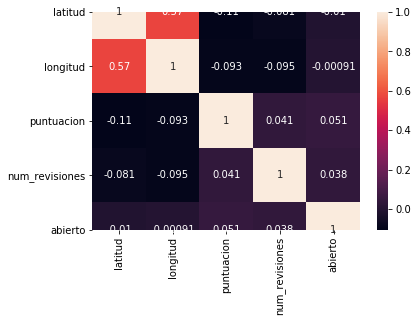

In [6]:
sns.heatmap(df.corr(), annot = True)

En este caso, de la matriz de correlación no se puede sacar gran información ya que el único que presenta cierta correlación son la latitud y longitud entre si. Pero el resto de variables númericas no presentan ninguna correlación.

Una vez explorado el dataframe generado por el preprocesado del fichero original hemos visto que no nos ha aportado mucha información por lo que hemos decidido procesar de nuevo y esta vez hemos generado un fichero con un atributo por categoría. Este proceso se ha realizado en el notebook llamado procesado_categorias.

### Analisis descriptivo de datos II


En este caso los atributos son los mismos que en el fichero utilizado en las explicaciones anteriores. Lo único que se ha agregado en este nuevo fichero en  el procesado

In [7]:
url = "datos_negocios_limpios_categoriasExtendidas.csv"
df = pd.read_csv(url)
df=df.drop(list(df.columns)[0],axis=1)
grouped = df.groupby('abierto')
abiertos=grouped.get_group(1)
cerrados=grouped.get_group(0)

In [8]:
a=df.describe()
a=a.drop(["latitud","longitud","puntuacion","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)


,Restaurants,Shopping,Food,Home Services,Beauty & Spas,Health & Medical,Local Services,Automotive,Nightlife,Bars,...,Japanese Sweets,Czech/Slovakian,Calligraphy,Entertainment Law,Customs Brokers,Soba,Street Art,Sauna Installation & Repair,Toxicologists,Ceremonial Clothing
mean,0.308246,0.165506,0.155699,0.10243,0.100566,0.08915,0.072333,0.068548,0.067987,0.058881,...,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005,0.000005


In [9]:
a=abiertos.describe()
a=a.drop(["latitud","longitud","puntuacion","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)


,Restaurants,Shopping,Food,Home Services,Beauty & Spas,Health & Medical,Local Services,Automotive,Nightlife,Event Planning & Services,...,Czech/Slovakian,Milkshake Bars,Eastern European,Hainan,Hang Gliding,Island Pub,Drive-Thru Bars,Bulgarian,Calligraphy,Beer Hall
mean,0.266437,0.168642,0.1464,0.116417,0.104368,0.100142,0.080934,0.075414,0.059271,0.056521,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [10]:
a=cerrados.describe()
a=a.drop(["latitud","longitud","puntuacion","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)


,Restaurants,Food,Shopping,Nightlife,Bars,Beauty & Spas,American (Traditional),American (New),Coffee & Tea,Sandwiches,...,Rodeo,Environmental Testing,Nephrologists,Otologists,Dietitians,Axe Throwing,Glass Blowing,Roof Inspectors,Carpet Dyeing,Vacation Rental Agents
mean,0.502699,0.19895,0.150921,0.108526,0.093475,0.082883,0.054072,0.049613,0.046649,0.046327,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
a=abiertos.describe()
b=pd.DataFrame({'puntuacion' : []})
b["puntuacion"]=a["puntuacion"]
b["num_revisiones"]=a["num_revisiones"]
b

,puntuacion,num_revisiones
count,158525.000000,158525.000000
mean,3.609787,35.495657
std,1.038052,116.597820
min,1.000000,3.000000
25%,3.000000,4.000000
50%,3.500000,9.000000
75%,4.500000,26.000000
max,5.000000,8348.000000


In [12]:
a=cerrados.describe()
b=pd.DataFrame({'puntuacion' : []})
b["puntuacion"]=a["puntuacion"]
b["num_revisiones"]=a["num_revisiones"]
b

,puntuacion,num_revisiones
count,34084.000000,34084.000000
mean,3.473257,24.438358
std,0.913528,72.210015
min,1.000000,3.000000
25%,3.000000,4.000000
50%,3.500000,8.000000
75%,4.000000,21.000000
max,5.000000,5484.000000


In [13]:
b=pd.DataFrame({'puntuacion' : []})
b["puntuacion"]=df["puntuacion"]
b["num_revisiones"]=df["num_revisiones"]
b["abierto"]=df["abierto"]

In [14]:
b.corr()

,puntuacion,num_revisiones,abierto
puntuacion,1.000000,0.040827,0.051160
num_revisiones,0.040827,1.000000,0.038315
abierto,0.051160,0.038315,1.000000


In [15]:
buenos = df.loc[df['puntuacion'] >= 3.5, df.columns]
malos = df.loc[df['puntuacion'] <= 2.5, df.columns]
buenos = buenos.drop("puntuacion",axis=1)
malos = malos.drop("puntuacion",axis=1)

In [16]:
a=buenos.describe()
a=a.drop(["latitud","longitud","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)

,Restaurants,Food,Shopping,Beauty & Spas,Home Services,Health & Medical,Local Services,Nightlife,Automotive,Active Life,...,Beach Volleyball,Tempura,Minho,Pita,Electricity Suppliers,Halfway Houses,Linens,Island Pub,Beer Hall,General Festivals
mean,0.296188,0.164356,0.163668,0.113618,0.096463,0.093815,0.074217,0.069339,0.064549,0.060959,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
a=malos.describe()
a=a.drop(["latitud","longitud","num_revisiones","abierto"], axis=1)
a=a.drop(["max","75%","50%","25%","min","std","count"], axis=0)
a.sort_values(by="mean",axis=1, ascending=False)

,Restaurants,Shopping,Home Services,Food,Health & Medical,Fast Food,Automotive,Local Services,Beauty & Spas,Real Estate,...,Baseball Fields,Pole Dancing Classes,Vocal Coach,Backshop,Golf Cart Rentals,Distilleries,Bus Rental,Food Banks,House Sitters,Childproofing
mean,0.279319,0.170044,0.144869,0.122261,0.090281,0.08729,0.086468,0.078541,0.073905,0.061018,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


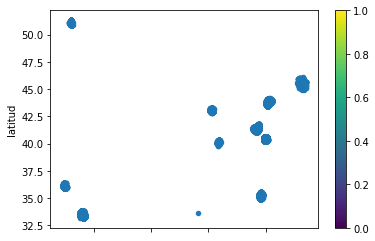

In [18]:
df.plot(kind="scatter", x="longitud", y="latitud", alpha=1,cmap=plt.get_cmap("jet")) 
plt.show()

In [19]:
grouped = df.groupby('estado')
dfAz=grouped.get_group("AZ")

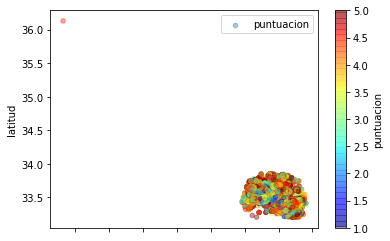

In [22]:
dfAz.plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

In [23]:
grouped = dfAz.groupby('ciudad')
dfPhx=grouped.get_group("Phoenix")

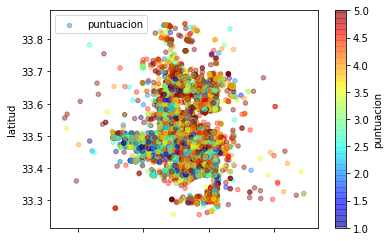

In [24]:
dfPhx.plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

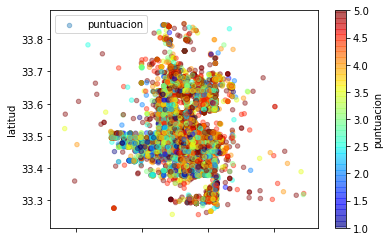

In [26]:
dfPhx.groupby("abierto").get_group(1).plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

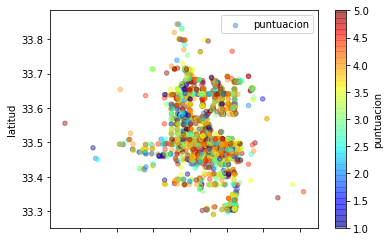

In [27]:
dfPhx.groupby("abierto").get_group(0).plot(kind="scatter", x="longitud", y="latitud",c="puntuacion",label="puntuacion", alpha=0.4,cmap=plt.get_cmap("jet")) 
plt.show()

In [28]:
dfPhxAbiertos=dfPhx.groupby("abierto").get_group(1)

In [57]:
a=list(dfPhxAbiertos.columns)
a.remove("longitud")
a.remove("latitud")
a.remove("puntuacion")
dfAux=dfPhxAbiertos.copy().drop(a,axis=1)

In [58]:
dfAux["latitud"]=dfAux["latitud"].round(2)
dfAux["longitud"]=dfAux["longitud"].round(2)

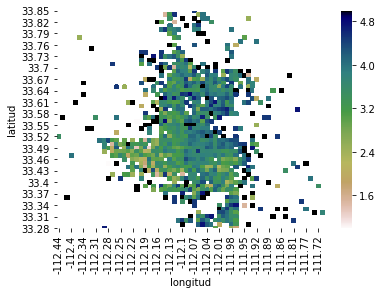

In [64]:
a=dfAux.groupby(["longitud","latitud"]).mean().reset_index()
a=a.pivot("latitud","longitud","puntuacion")
a=a.reindex(index=a.index[::-1])
sns.heatmap(a ,cmap="gist_earth_r")
plt.show()